In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import warnings
warnings.filterwarnings('ignore')

In [2]:
churn = pd.read_csv(r"C:/Users/DELL/Desktop/data/ML/churn_data (1).csv")
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
internet = pd.read_csv(r"C:/Users/DELL/Downloads/internet_data (1) (1).csv")
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [4]:
customer = pd.read_csv(r"C:/Users/DELL/Desktop/data/ML/customer_data (1).csv")
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
merge = pd.merge(churn , customer, how = 'inner', on= 'customerID')

In [6]:
df = pd.merge( merge , internet, how = 'inner', on= 'customerID')

In [7]:
df

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Male,...,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


In [8]:
varlist = ['PaperlessBilling','PhoneService','Churn','Partner','Dependents']
def binary_map(x):
    return x.map({'Yes':1 , 'No':0})
df[varlist]= df[varlist].apply(binary_map)

In [9]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   int64  
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   int64  
 12  Dependents        7043 non-null   int64  
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [11]:
status = pd.get_dummies(df[['Contract', 'PaymentMethod', 'gender', 'InternetService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']], drop_first = True)

In [12]:
df =pd.concat([df,status],axis=1)

In [13]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# dropping original columns for which dummies were created
df.drop(['customerID','Contract', 'PaymentMethod', 'gender', 'InternetService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],axis=1 , inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   PhoneService                           7043 non-null   int64  
 2   PaperlessBilling                       7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   object 
 5   Churn                                  7043 non-null   int64  
 6   SeniorCitizen                          7043 non-null   int64  
 7   Partner                                7043 non-null   int64  
 8   Dependents                             7043 non-null   int64  
 9   Contract_One year                      7043 non-null   uint8  
 10  Contract_Two year                      7043 non-null   uint8  
 11  Paym

In [16]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   PhoneService                           7043 non-null   int64  
 2   PaperlessBilling                       7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   SeniorCitizen                          7043 non-null   int64  
 7   Partner                                7043 non-null   int64  
 8   Dependents                             7043 non-null   int64  
 9   Contract_One year                      7043 non-null   uint8  
 10  Contract_Two year                      7043 non-null   uint8  
 11  Paym

In [18]:
df.isnull().sum()

tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                

In [19]:
df= df.dropna()

In [20]:
df.isnull().sum()

tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProte

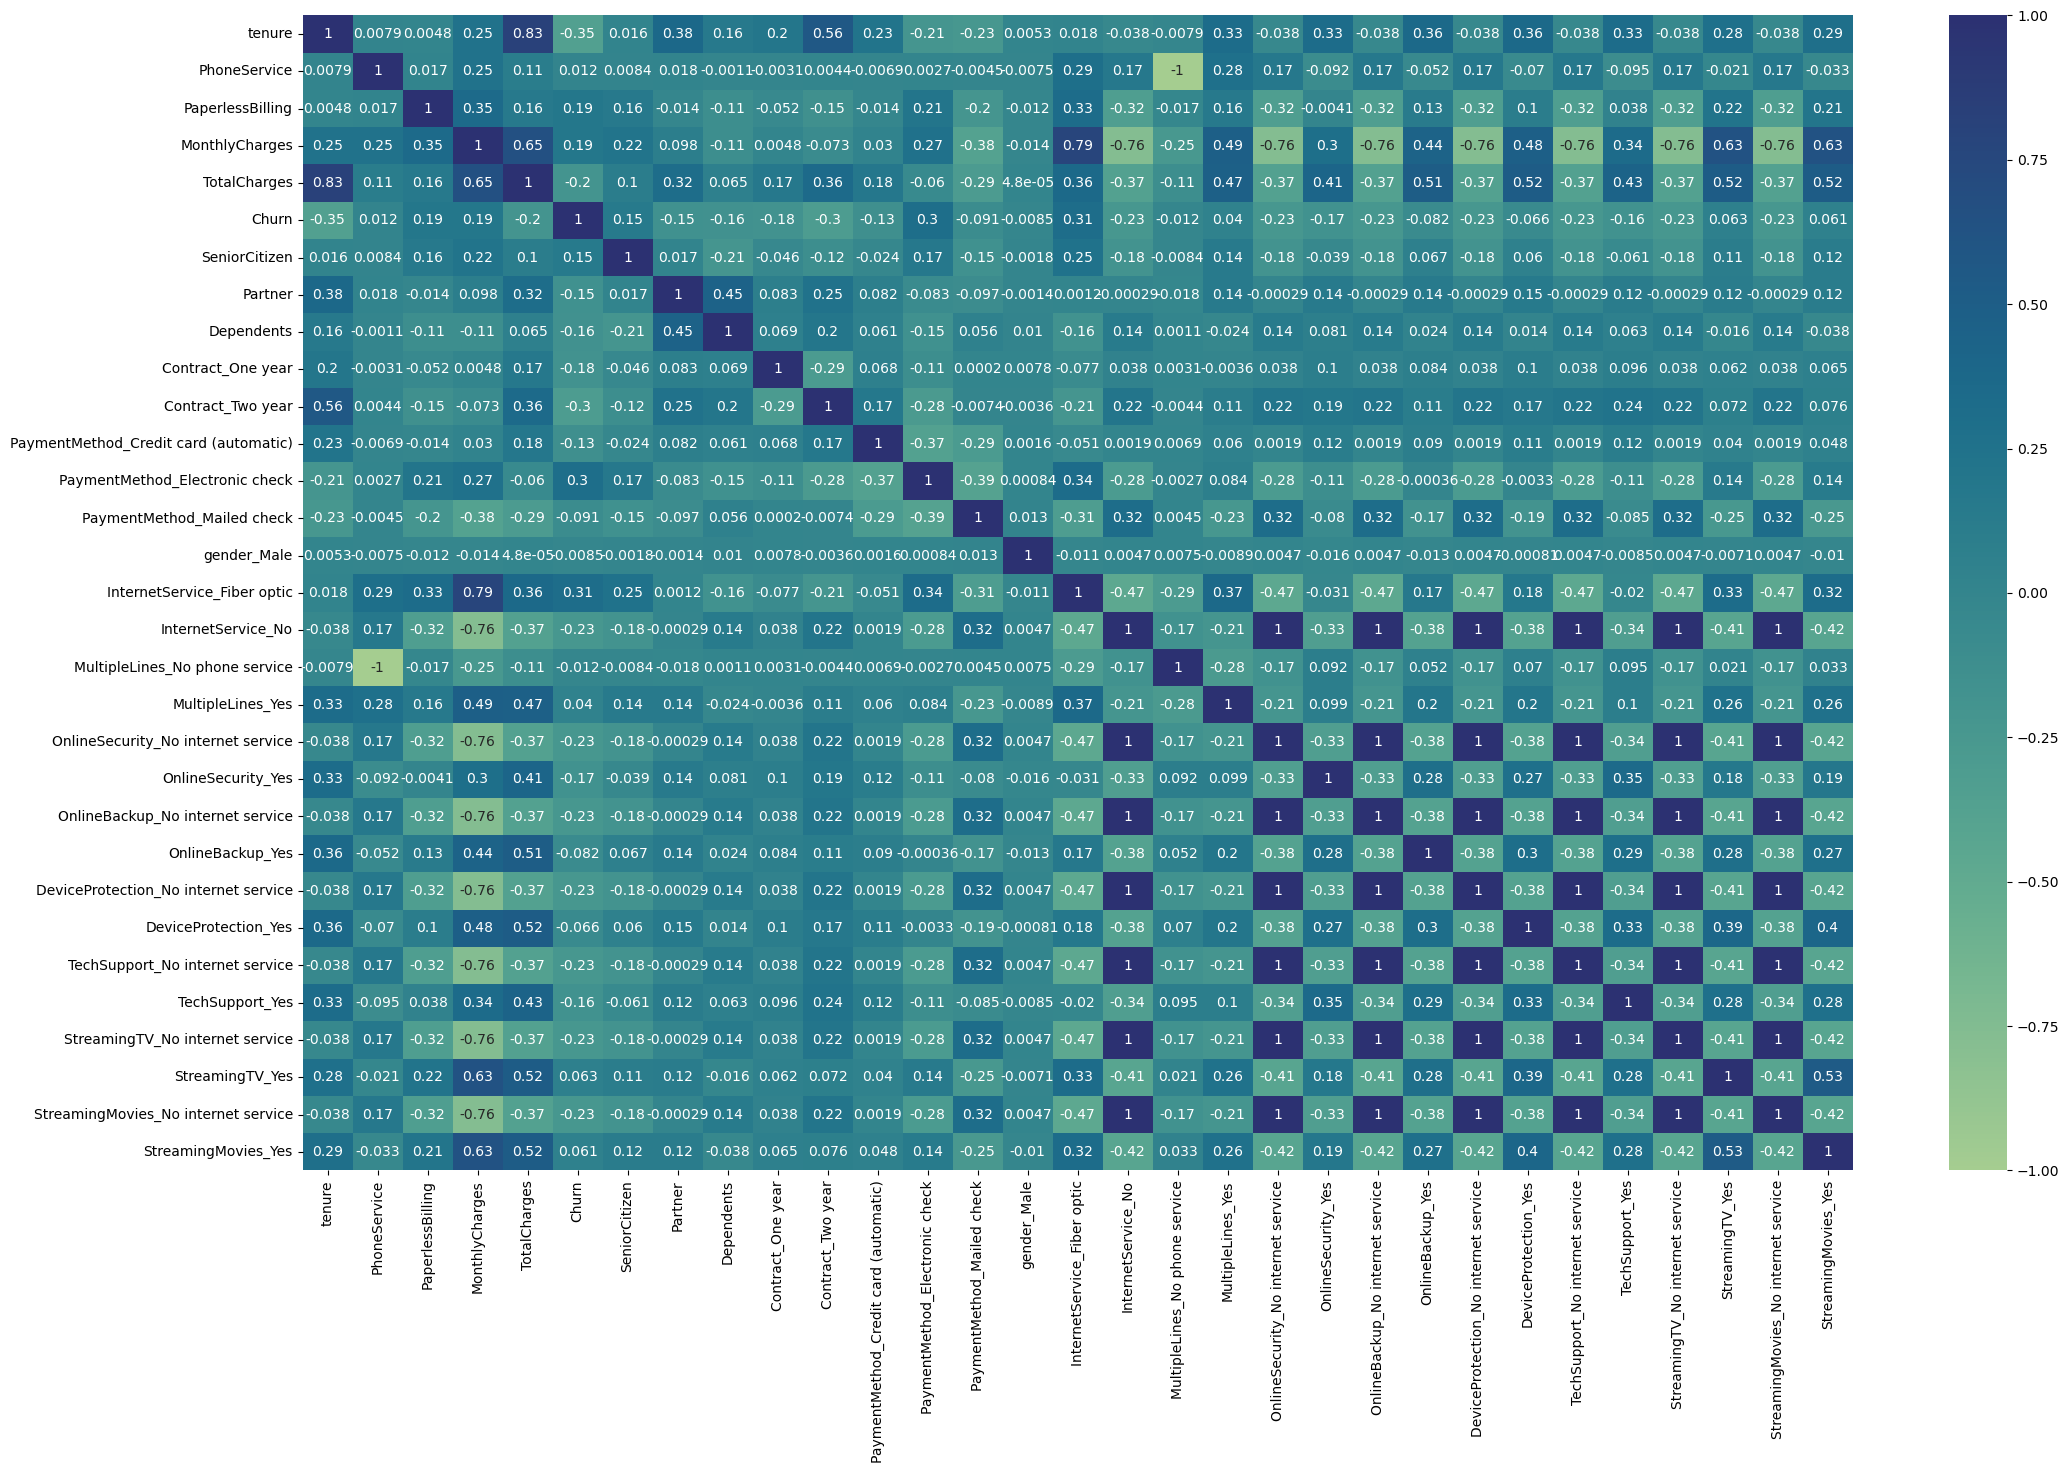

In [21]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),cmap='crest',annot=True)
plt.show()

In [22]:
X = df.drop(['Churn'],axis=1)
y= df['Churn']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,InternetService_No,inf
28,StreamingMovies_No internet service,inf
26,StreamingTV_No internet service,inf
24,TechSupport_No internet service,inf
22,DeviceProtection_No internet service,inf
20,OnlineBackup_No internet service,inf
18,OnlineSecurity_No internet service,inf
1,PhoneService,1783.72
3,MonthlyCharges,874.28
14,InternetService_Fiber optic,149.17


In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [27]:
X_train.drop(["StreamingMovies_No internet service","OnlineBackup_No internet service","StreamingTV_No internet service","TechSupport_No internet service","DeviceProtection_No internet service","OnlineSecurity_No internet service","InternetService_No"],axis=1,inplace=True)

In [28]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,39.98
3,MonthlyCharges,23.32
4,TotalCharges,10.61
14,InternetService_Fiber optic,7.80
0,tenure,7.43
15,MultipleLines_No phone service,3.83
9,Contract_Two year,2.70
22,StreamingMovies_Yes,2.46
21,StreamingTV_Yes,2.44
11,PaymentMethod_Electronic check,1.99


In [29]:
X_train.drop('PhoneService',axis=1,inplace=True)

In [30]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,43.78
3,TotalCharges,18.74
0,tenure,17.25
13,InternetService_Fiber optic,9.23
21,StreamingMovies_Yes,3.38
8,Contract_Two year,3.37
20,StreamingTV_Yes,3.30
1,PaperlessBilling,2.92
10,PaymentMethod_Electronic check,2.85
5,Partner,2.83


In [31]:
X_train.drop('MonthlyCharges',axis=1,inplace=True)

In [32]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,17.59
0,tenure,16.02
12,InternetService_Fiber optic,3.50
7,Contract_Two year,3.32
4,Partner,2.82
20,StreamingMovies_Yes,2.78
19,StreamingTV_Yes,2.75
1,PaperlessBilling,2.69
14,MultipleLines_Yes,2.43
9,PaymentMethod_Electronic check,2.32


In [33]:
X_train.drop('StreamingMovies_Yes',axis=1,inplace=True)

In [34]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,16.48
0,tenure,15.63
12,InternetService_Fiber optic,3.49
7,Contract_Two year,3.31
4,Partner,2.82
1,PaperlessBilling,2.67
19,StreamingTV_Yes,2.61
14,MultipleLines_Yes,2.43
9,PaymentMethod_Electronic check,2.30
17,DeviceProtection_Yes,2.26


In [35]:
X_train.drop(['OnlineBackup_Yes','OnlineSecurity_Yes'],axis=1,inplace=True)

In [36]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,tenure,15.44
2,TotalCharges,14.33
12,InternetService_Fiber optic,3.44
7,Contract_Two year,3.31
4,Partner,2.82
1,PaperlessBilling,2.66
17,StreamingTV_Yes,2.60
14,MultipleLines_Yes,2.42
9,PaymentMethod_Electronic check,2.28
15,DeviceProtection_Yes,2.25


In [37]:
X_test.drop(["StreamingMovies_No internet service","OnlineBackup_No internet service","StreamingTV_No internet service","TechSupport_No internet service","DeviceProtection_No internet service","OnlineSecurity_No internet service","InternetService_No"],axis=1,inplace=True)

In [38]:
X_test.drop('PhoneService',axis=1,inplace=True)

In [39]:
X_test.drop('MonthlyCharges',axis=1,inplace=True)

In [40]:
X_test.drop('StreamingMovies_Yes',axis=1,inplace=True)

In [41]:
X_test.drop(['OnlineBackup_Yes','OnlineSecurity_Yes'],axis=1,inplace=True)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [43]:
X_train = scaler.fit_transform(X_train)


In [44]:
X_test=scaler.fit_transform(X_test)

In [45]:
y_train = np.array(y_train)

In [46]:
y_train.shape

(4922,)

In [47]:
y_train= y_train.reshape(4922,-1)

In [48]:
y_train = scaler.fit_transform(y_train)

In [49]:
y_test=np.array(y_test)

In [50]:
y_test=y_test.reshape(2110,1)

In [51]:
y_test=scaler.fit_transform(y_test)

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [53]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [55]:
y_pred = logreg.predict(X_test)

In [56]:
from sklearn import metrics

In [61]:
confusion = metrics.confusion_matrix(y_test,y_pred)
print(confusion)

[[1385  164]
 [ 266  295]]


In [63]:
print(metrics.accuracy_score(y_test,y_pred))

0.7962085308056872
